<a href="https://colab.research.google.com/github/muhammadfajrulfaiz/Project--Training/blob/main/PYTN_Assgn_1_%3Cbatch_4%3E_Muhammad_Fajrul_Faiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Library

In [ ]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import folium 
import seaborn as sns
import os
from wordcloud import WordCloud, STOPWORDS
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Loading

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Hacktiv8/london_crime_by_lsoa.csv")

## Exploratory Data Analyst

In [ ]:
#Melihat sekilas tentang dataset london_crime 
df.head(50)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [ ]:
print(df.shape)

(13490604, 7)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [ ]:
#check nulls values
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

##Visualization

## PIE CHART

In [ ]:
#total crime checking per years
year = df['year'].unique()
print (year)
sum_year = df.groupby('year').sum()
sum_of_year = sum_year['value'].to_numpy()
print(sum_of_year)

[2016 2015 2008 2012 2010 2013 2014 2011 2009]
[738641 717214 715324 724915 737329 686407 680183 711624 736121]


<ipython-input-41-23dc5ef3c673>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_year = df.groupby('year').sum()


In [ ]:
#lets check what is the biggest category crime in London from 2008 until 2016
sizes =df.groupby(['major_category']).size()
print (sizes)

major_category
Burglary                       1043604
Criminal Damage                2069172
Drugs                          1179468
Fraud or Forgery                236520
Other Notifiable Offences       776304
Robbery                         939384
Sexual Offences                 108108
Theft and Handling             3966300
Violence Against the Person    3171744
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

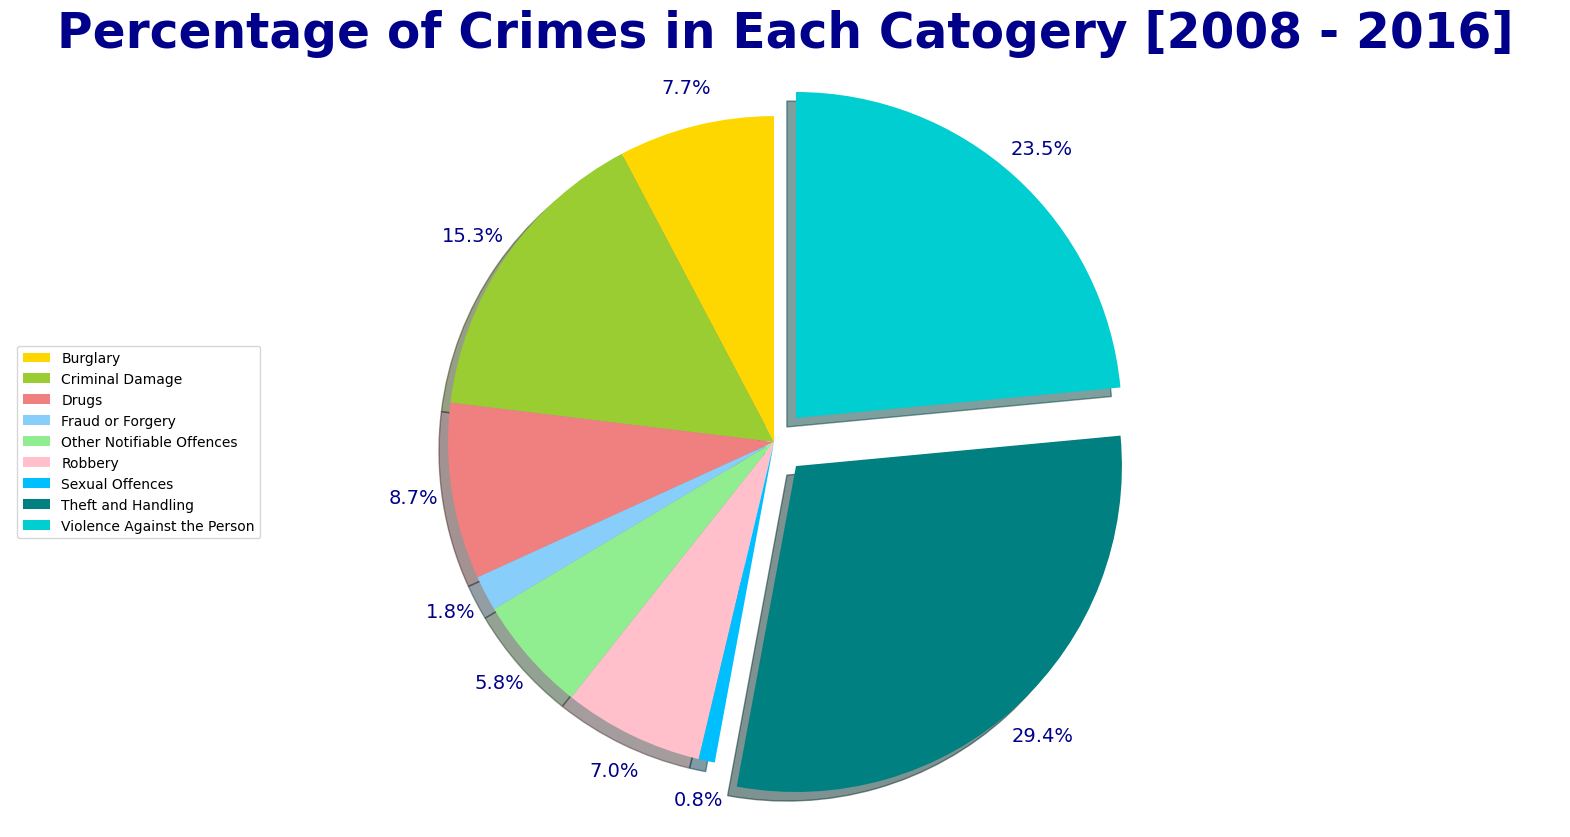

In [ ]:
#And then lets make it in pie chart from the data 
color_list = ['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink','deepskyblue','teal','darkturquoise']
explode_list = [0,0,0,0,0,0,0,0.1,0.1]
font1 = {'color':  'darkblue',
        'weight': 'bold',
        'size': 35,
        }

lable =df['major_category'].unique 
plt.figure(figsize=(20,10))
ab = plt.pie(sizes,
            autopct='%1.1f%%',
            startangle=90,
            shadow= True,
            labels= None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list,
            textprops={'fontsize': 14,'color':'darkblue'}
                                    )
                                   
plt.title('Percentage of Crimes in Each Catogery [2008 - 2016]', fontdict=font1)
plt.axis('equal')
plt.legend(labels=sizes.index, loc = 'center left')
plt.show      

Dari hasil yang didapat kategori kriminal yang terjadi di London pada tahun 2008 sampai dengan 2016 terbesar yaitu "Theft and Handling" dan terbesar kedua yaitu "Violence Against the Person"

## FOLIUM MAPS 

In [ ]:
#Folium Maps London city
world_map=folium.Map(location=[51.0260617, -1.3993741],zoom_start=8)
display(world_map)

##WordCloud

In [ ]:
major_category_crime =  df.groupby("major_category")
major_category_crime.describe().head(10)

value                                     \
                                 count      mean       std  min  25%  50%   
major_category                                                              
Burglary                     1043604.0  0.722777  1.161423  0.0  0.0  0.0   
Criminal Damage              2069172.0  0.304923  0.688080  0.0  0.0  0.0   
Drugs                        1179468.0  0.399133  1.606427  0.0  0.0  0.0   
Fraud or Forgery              236520.0  0.022514  0.352597  0.0  0.0  0.0   
Other Notifiable Offences     776304.0  0.136994  0.655227  0.0  0.0  0.0   
Robbery                       939384.0  0.275577  0.806354  0.0  0.0  0.0   
Sexual Offences               108108.0  0.011775  0.148251  0.0  0.0  0.0   
Theft and Handling           3966300.0  0.671119  2.824089  0.0  0.0  0.0   
Violence Against the Person  3171744.0  0.491238  1.096757  0.0  0.0  0.0   

                                              year          ...          \
                             75%    max      count    mean  ...     75%   
major_category                                              ...           
Burglary                     1.0   37.0  1043604.0  2012.0  ...  2014.0   
Criminal Damage              0.0   49.0  2069172.0  2012.0  ...  2014.0   
Drugs                        0.0  309.0  1179468.0  2012.0  ...  2014.0   
Fraud or Forgery             0.0   52.0   236520.0  2012.0  ...  2014.0   
Other Notifiable Offences    0.0   94.0   776304.0  2012.0  ...  2014.0   
Robbery                      0.0   53.0   939384.0  2012.0  ...  2014.0   
Sexual Offences              0.0   17.0   108108.0  2012.0  ...  2014.0   
Theft and Handling           1.0  300.0  3966300.0  2012.0  ...  2014.0   
Violence Against the Person  1.0   52.0  3171744.0  2012.0  ...  2014.0   

                                         month                                 \
                                max      count mean       std  min   25%  50%   
major_category                                                                  
Burglary                     2016.0  1043604.0  6.5  3.452054  1.0  3.75  6.5   
Criminal Damage              2016.0  2069172.0  6.5  3.452053  1.0  3.75  6.5   
Drugs                        2016.0  1179468.0  6.5  3.452054  1.0  3.75  6.5   
Fraud or Forgery             2016.0   236520.0  6.5  3.452060  1.0  3.75  6.5   
Other Notifiable Offences    2016.0   776304.0  6.5  3.452055  1.0  3.75  6.5   
Robbery                      2016.0   939384.0  6.5  3.452054  1.0  3.75  6.5   
Sexual Offences              2016.0   108108.0  6.5  3.452068  1.0  3.75  6.5   
Theft and Handling           2016.0  3966300.0  6.5  3.452053  1.0  3.75  6.5   
Violence Against the Person  2016.0  3171744.0  6.5  3.452053  1.0  3.75  6.5   

                                         
                              75%   max  
major_category                           
Burglary                     9.25  12.0  
Criminal Damage              9.25  12.0  
Drugs                        9.25  12.0  
Fraud or Forgery             9.25  12.0  
Other Notifiable Offences    9.25  12.0  
Robbery                      9.25  12.0  
Sexual Offences              9.25  12.0  
Theft and Handling           9.25  12.0  
Violence Against the Person  9.25  12.0  

[9 rows x 24 columns]

In [ ]:
brorugh_str = str (df['borough'])
print(brorugh_str)

0              Croydon
1            Greenwich
2              Bromley
3            Redbridge
4           Wandsworth
               ...    
13490599         Brent
13490600    Hillingdon
13490601        Sutton
13490602       Croydon
13490603        Merton
Name: borough, Length: 13490604, dtype: object


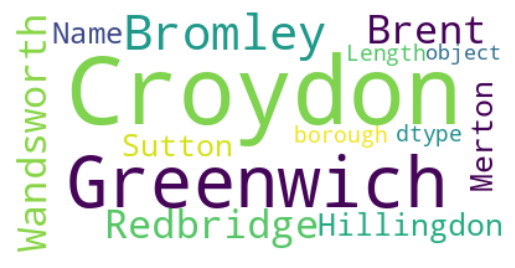

<Figure size 1400x1800 with 0 Axes>

In [ ]:
#Word Cloud dalam hal ini saya ingin melihat wilayah yang sering muncul dalam data atau melihat wialayah yang sering terjadi kriminal di london
stopwords = set(STOPWORDS)
Crime_in_London = WordCloud(
    background_color = 'white',
    max_words = 13490604,
    stopwords = stopwords.add('Length')
    )

Crime_in_London.generate(brorugh_str)
plt.imshow(Crime_in_London,
           interpolation='bilinear')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.show()

Didapat bahwa daerah di london yang sering terjadi kriminal yaitu Croydon, Greenwich, dan Bromley

## BAR CHART

In [ ]:
#check type and total of crimes that hat are taking place in 2011 - 2016 
dataframe = pd.DataFrame(df,
                         columns=['major_category','value','year'])
tabel = dataframe[dataframe ['year'] > 2010]
label = dataframe['major_category'].unique()
print("The type of crimes that are taking place in 2011 - 2016 ")
print(label)
totals = tabel.groupby('major_category').sum()
Total = totals['value'].to_numpy()
print ("total of crimes that occurred in each category 2011 - 2016: ")
print(Total)

The type of crimes that are taking place in 2011 - 2016 
['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']
total of crimes that occurred in each category 2011 - 2016: 
[ 488756  375604  282738       0   74825  167337       0 1807753 1079566]


Category_Crime
Fraud or Forgery                     0
Theft and Handling                   0
Criminal Damage                  74825
Drugs                           167337
Robbery                         282738
Violence Against the Person     375604
Burglary                        488756
Sexual Offences                1079566
Other Notifiable Offences      1807753
Name: Value, dtype: int64


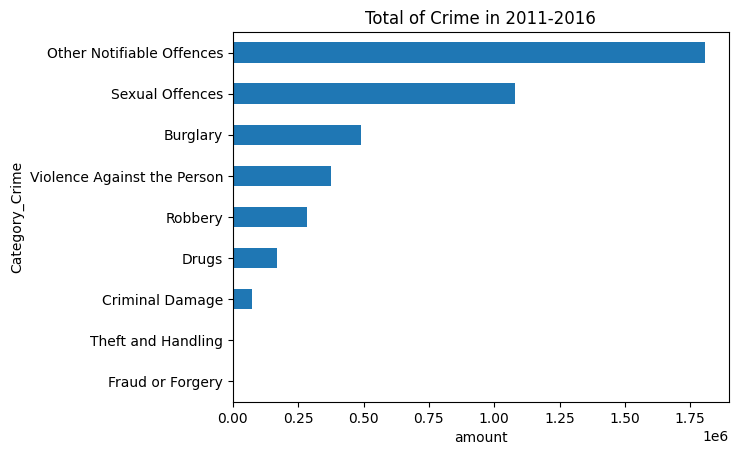

In [ ]:
#Make Barchart to visualization the biggest crime for each category in 2011 - 2016 
df_crime = [['Burglary', 488756], ['Violence Against the Person', 375604],['Robbery', 282738],['Theft and Handling', 0],['Criminal Damage', 74825], ['Drugs', 167337],['Fraud or Forgery', 0],['Other Notifiable Offences', 1807753],['Sexual Offences', 1079566]]

Crimeandvalue = pd.DataFrame(df_crime, columns=['Category_Crime', 'Value'])
x = Crimeandvalue.groupby('Category_Crime')['Value'].sum().sort_values().tail(15)
print (x)
x.plot(kind='barh')
plt.xlabel("amount")
plt.title("Total of Crime in 2011-2016")
plt.show()

Dari hasil visualisasi, kejahatan terbesar yang terjadi di tahun 2011 - 2016 ada di kategori "other Notifiable Offences" dan untuk kategori "Fraud or Forgery" dan "Theft and Handling"

##BOX PLOT

In [ ]:
#df_total = df.groupby('major_category')['value'].sum().sort_values().tail(15)
Crimeandvalue


,Category_Crime,Value
0,Burglary,488756
1,Violence Against the Person,375604
2,Robbery,282738
3,Theft and Handling,0
4,Criminal Damage,74825
5,Drugs,167337
6,Fraud or Forgery,0
7,Other Notifiable Offences,1807753
8,Sexual Offences,1079566


Text(0.5, 1.0, 'Box plot data of Crime in 2011-2016')

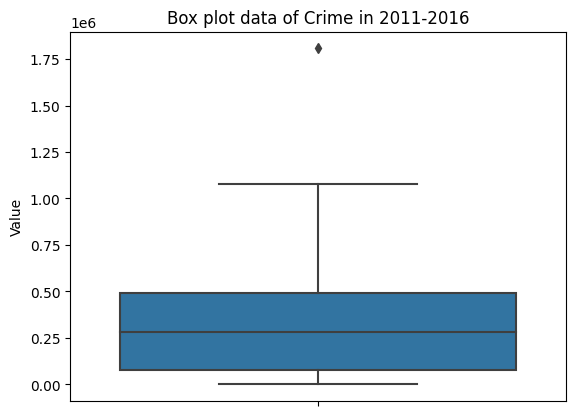

In [ ]:
sns.boxplot(y=Crimeandvalue['Value'])
plt.title("Box plot data of Crime in 2011-2016")

##HISTOGRAM

In [ ]:
#make new dataframe only 3 columns
df_new = pd.DataFrame(df,
                    columns=['year','major_category','value'])
df_new

,year,major_category,value
0,2016,Burglary,0
1,2016,Violence Against the Person,0
2,2015,Violence Against the Person,0
3,2016,Burglary,0
4,2008,Robbery,0
...,...,...,...
13490599,2015,Criminal Damage,0
13490600,2015,Robbery,1
13490601,2011,Burglary,0
13490602,2011,Robbery,0


In [ ]:
#Drop few category crime 
df_new.drop(df_new.index[(df_new["major_category"]=="Burglary")],
    axis=0,
    inplace= True
    )
df_new.drop(df_new.index[(df_new["major_category"]=="Robbery")],
    axis=0,
    inplace= True
    )
df_new.drop(df_new.index[(df_new["major_category"]=="Drugs")],
    axis=0,
    inplace= True
    )
df_new.drop(df_new.index[(df_new["major_category"]=="Fraud or Forgery")],
    axis=0,
    inplace= True
    )
df_new.drop(df_new.index[(df_new["major_category"]=="Other Notifiable Offences")],
    axis=0,
    inplace= True
    )
df_new.drop(df_new.index[(df_new["major_category"]=="Sexual Offences")],
    axis=0,
    inplace= True
    )

In [ ]:
df_new.groupby(['year', 'major_category']).sum()

value
year major_category                     
2008 Criminal Damage               91872
     Theft and Handling           283692
     Violence Against the Person  159844
2009 Criminal Damage               85565
     Theft and Handling           279492
     Violence Against the Person  160777
2010 Criminal Damage               77897
     Theft and Handling           290924
     Violence Against the Person  157894
2011 Criminal Damage               70914
     Theft and Handling           309292
     Violence Against the Person  146901
2012 Criminal Damage               62158
     Theft and Handling           334054
     Violence Against the Person  150014
2013 Criminal Damage               56206
     Theft and Handling           306372
     Violence Against the Person  146181
2014 Criminal Damage               59279
     Theft and Handling           279880
     Violence Against the Person  185349
2015 Criminal Damage               62976
     Theft and Handling           284022
     Violence Against the Person  218740
2016 Criminal Damage               64071
     Theft and Handling           294133
     Violence Against the Person  232381

In [ ]:
crosstab = pd.crosstab(df_new.year, df_new.major_category, values=df_new.value, aggfunc='sum').round(0)
crosstab

major_category,Criminal Damage,Theft and Handling,Violence Against the Person
year,,,
2008,91872,283692,159844
2009,85565,279492,160777
2010,77897,290924,157894
2011,70914,309292,146901
2012,62158,334054,150014
2013,56206,306372,146181
2014,59279,279880,185349
2015,62976,284022,218740
2016,64071,294133,232381


Text(0.5, 0, 'x')

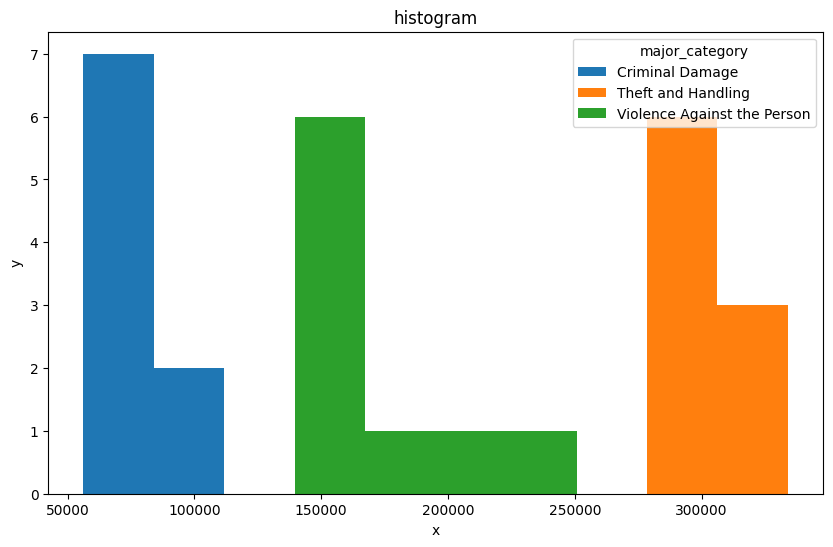

In [ ]:
crosstab.plot(kind = 'hist', figsize=(10,6))
plt.title('histogram')
plt.ylabel('y')
plt.xlabel('x')

[7 2 0 6 1 1 1 0 6 3]
[ 56206.   83990.8 111775.6 139560.4 167345.2 195130.  222914.8 250699.6
 278484.4 306269.2 334054. ]


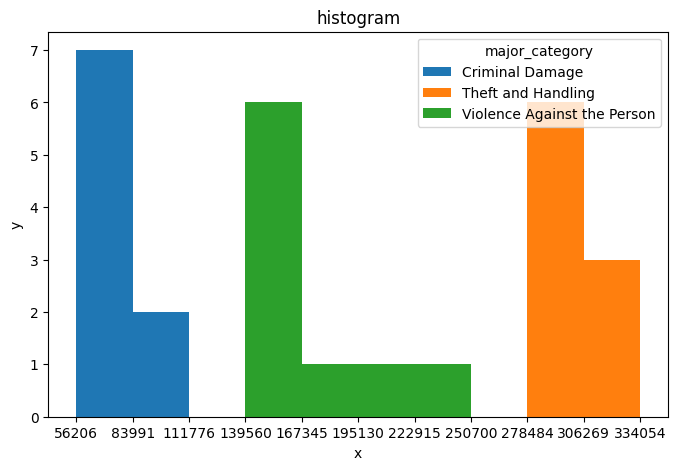

In [ ]:
count, bin_edges = np.histogram(crosstab)
print(count)
print(bin_edges)
crosstab.plot(kind='hist', figsize=(8,5), xticks=bin_edges)
plt.title('histogram')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## AREA PLOT

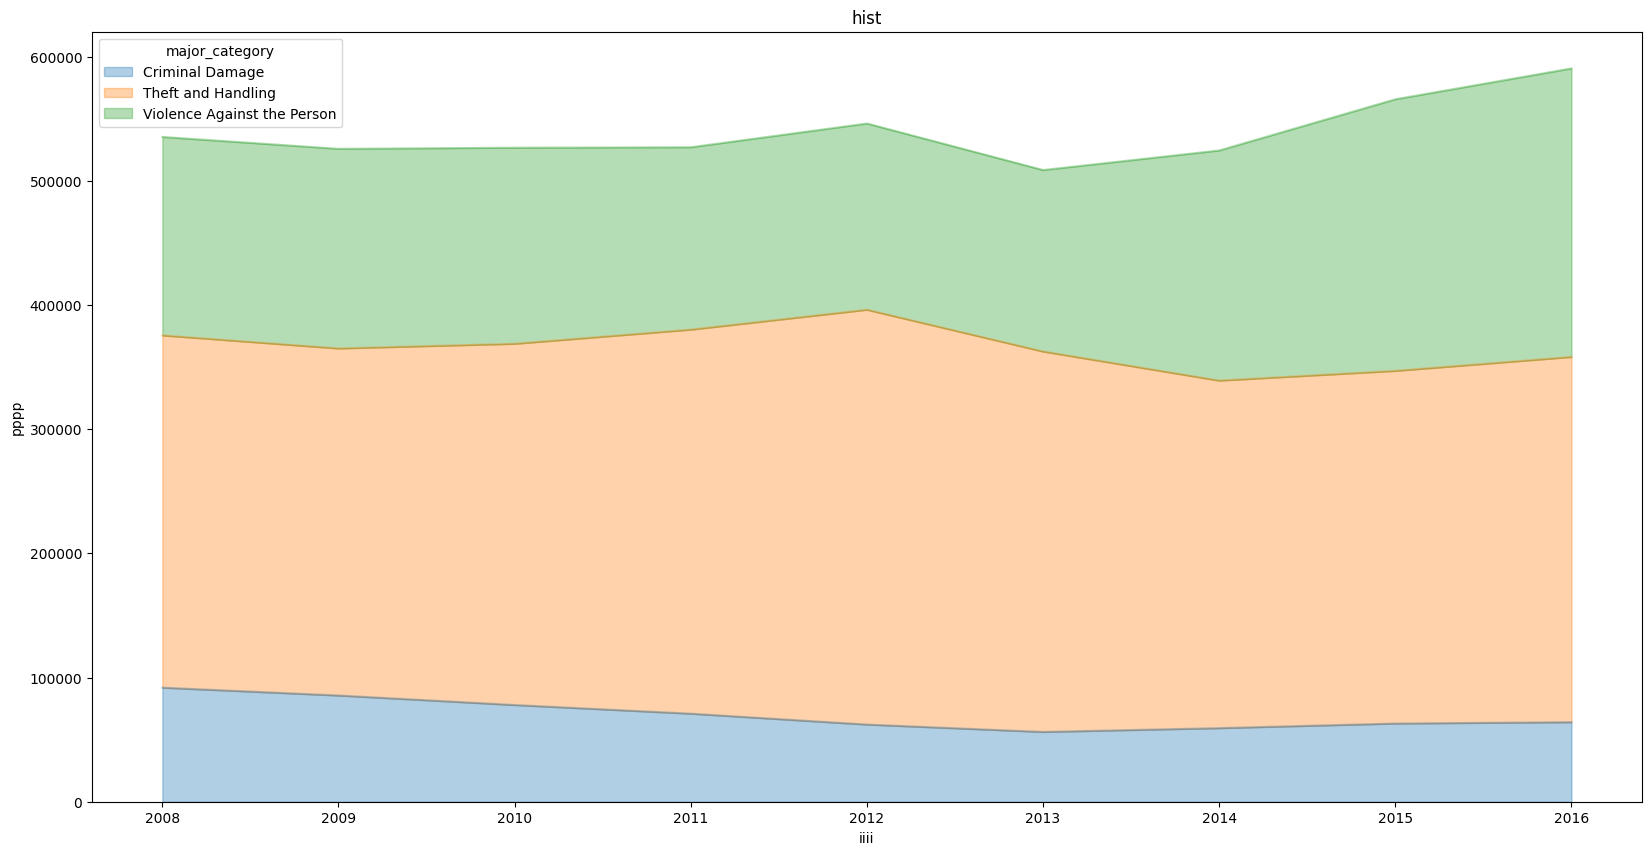

In [ ]:
crosstab.plot(kind='area', alpha = 0.35, figsize=(20,10))
plt.title('hist')
plt.ylabel('pppp')
plt.xlabel('iiii')
plt.show()

Text(0.5, 0, 'years')

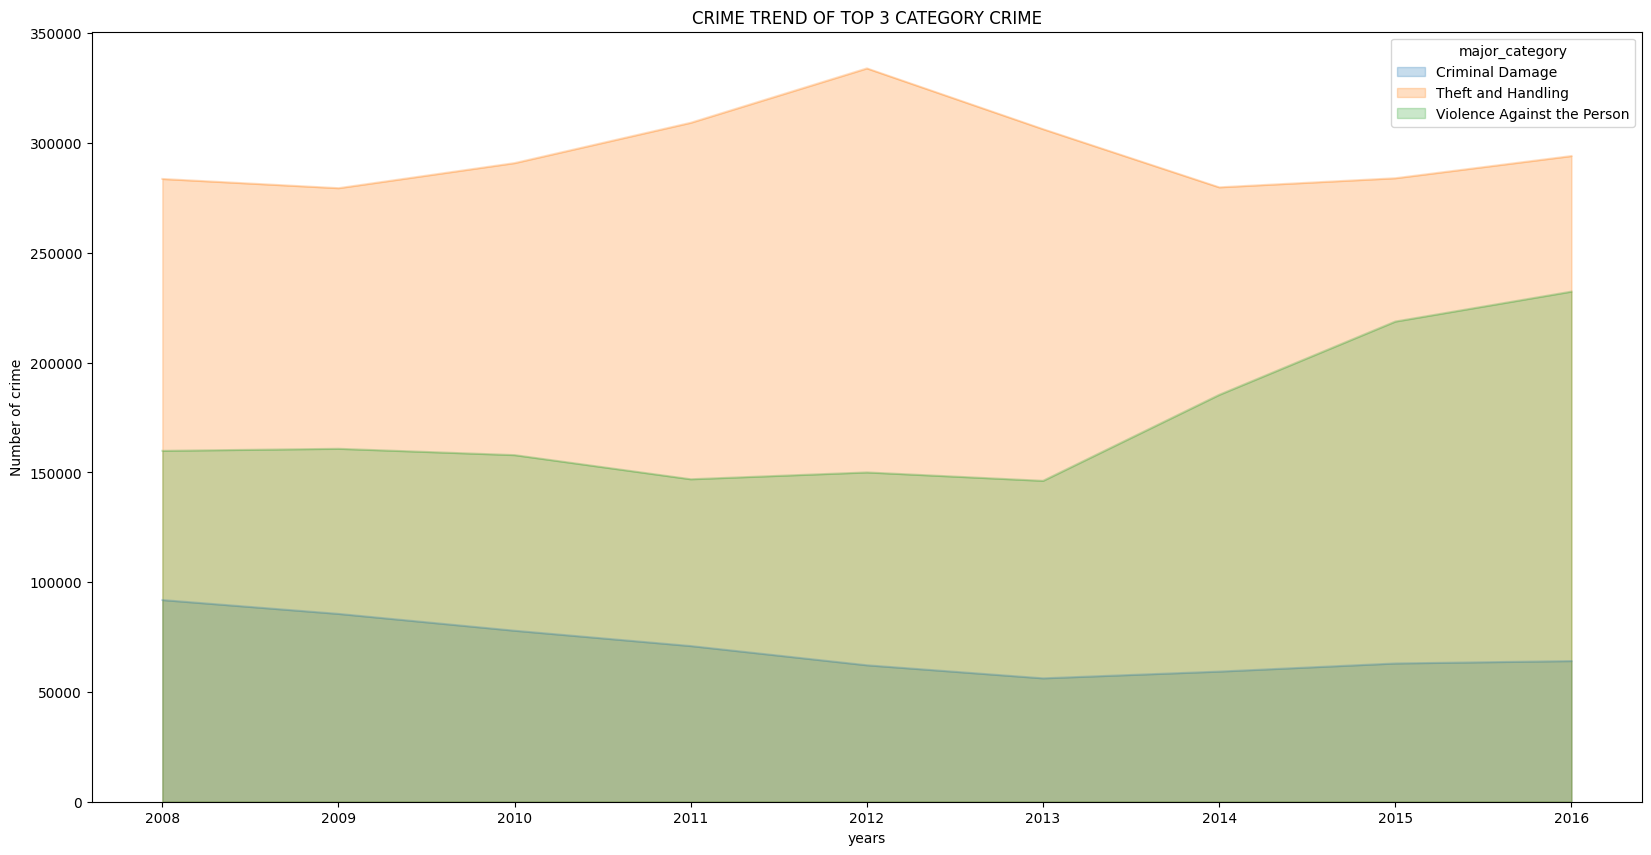

In [ ]:
crosstab.plot(kind='area',
              alpha=0.25,
              stacked=False,
              figsize=(20,10),
              )
plt.title('CRIME TREND OF TOP 3 CATEGORY CRIME')
plt.ylabel('Number of crime')
plt.xlabel('years')

Text(0.5, 0, 'years')

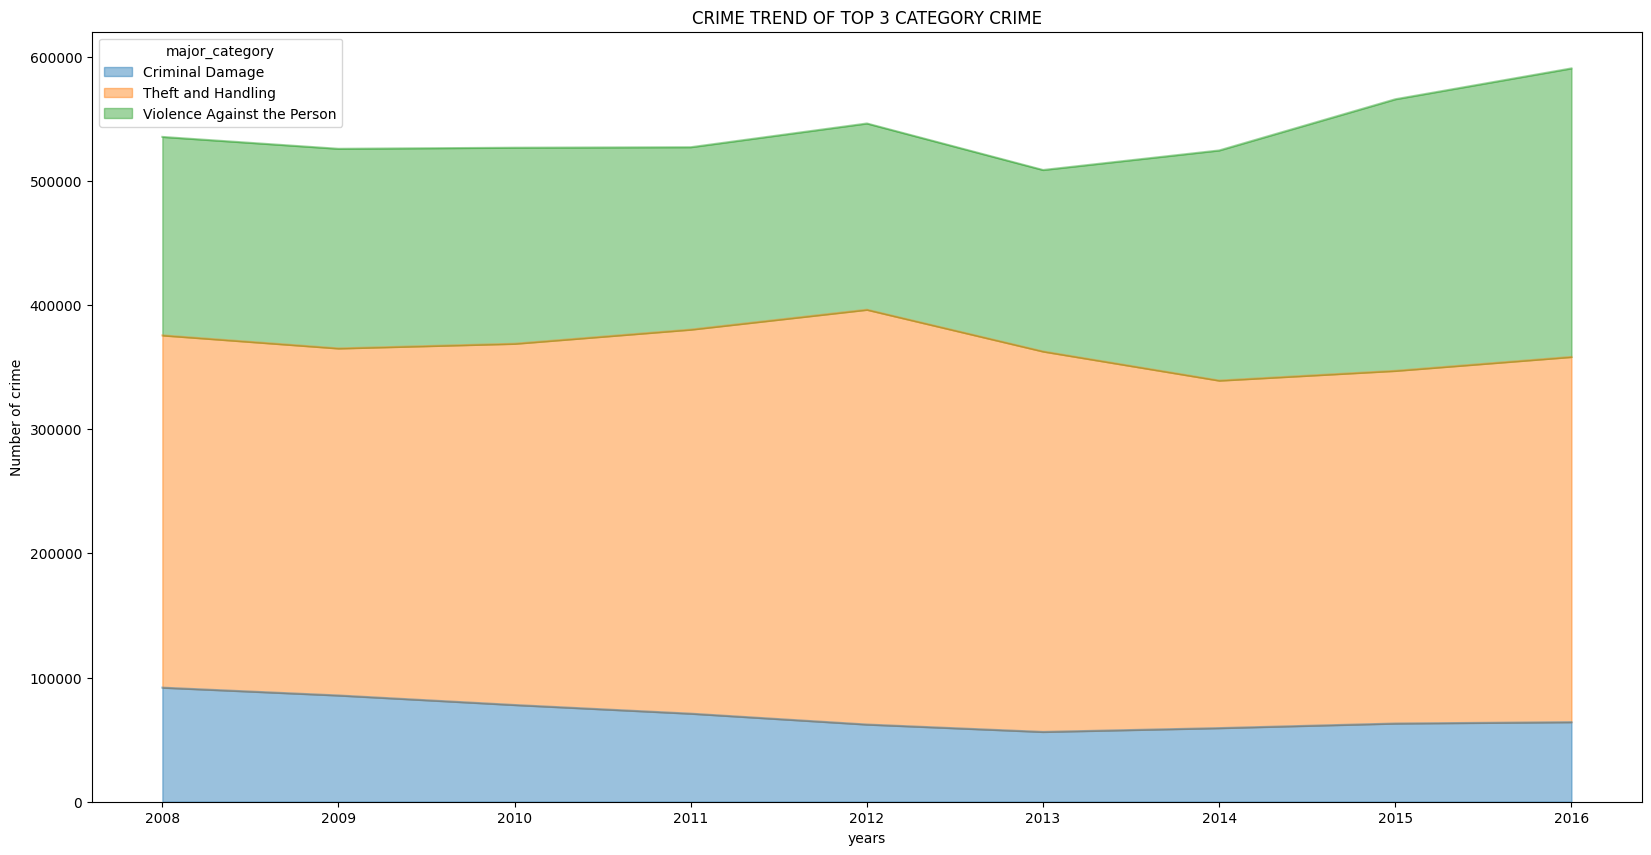

In [ ]:
crosstab.plot(kind='area',
              alpha= 0.45,
              stacked=True,
              figsize=(20,10),
              )
plt.title('CRIME TREND OF TOP 3 CATEGORY CRIME')
plt.ylabel('Number of crime')
plt.xlabel('years')

##SCATTER PLOT

In [ ]:
totaltop3 = pd.DataFrame(crosstab.sum(axis=1))
totaltop3.reset_index(inplace=True)
totaltop3.columns = ['year', 'total']
totaltop3['year'] = totaltop3['year'].astype(int)
totaltop3

,year,total
0,2008,535408
1,2009,525834
2,2010,526715
3,2011,527107
4,2012,546226
5,2013,508759
6,2014,524508
7,2015,565738
8,2016,590585


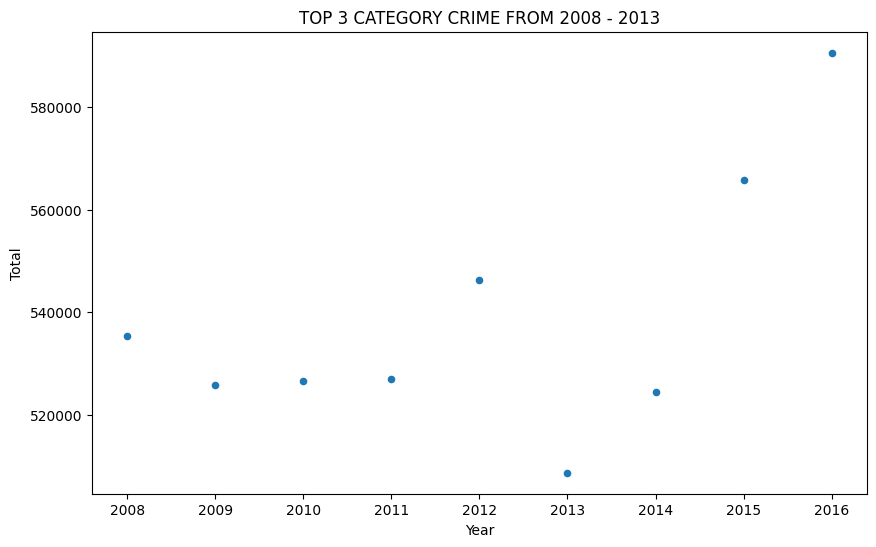

In [ ]:
totaltop3.plot(kind='scatter', x = 'year', y = 'total', figsize=(10,6))
color = 'red'
plt.title('TOP 3 CATEGORY CRIME FROM 2008 - 2013')
plt.xlabel('Year')
plt.ylabel('Total')
plt.show()